In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(recent_date)




('2017-08-23',)


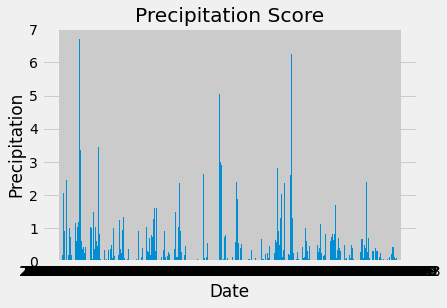

In [12]:
# Calculate the date one year from the last date in data set.
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation=session.query(measurement.date,measurement.prcp).filter(measurement.date>=query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation,columns=["date","precipitation score"])

precipitation_df.set_index("date")
# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values(["date"])

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precipitation_df["date"],precipitation_df["precipitation score"])
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title("Precipitation Score")

plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station=session.query(measurement.station).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc())


In [16]:
most_active=active_station.first()
most_active

('USC00519281')

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station==most_active[0]).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature=session.query(measurement.tobs).filter(measurement.station==most_active[0]).\
    filter(measurement.date>=query_date).all()
temperature_df=pd.DataFrame(temperature, columns=["Temperature_observation"])
temperature_df

,Temperature_observation
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 1.0, '12 months of temperature observation data')

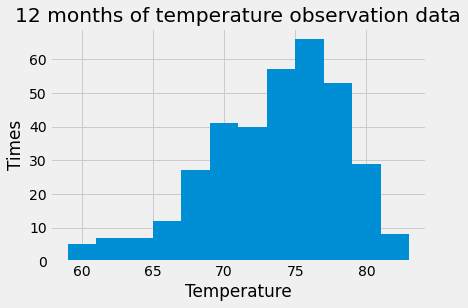

In [19]:
plt.hist(temperature_df,bins=12)
plt.ylabel("Times")
plt.xlabel("Temperature")
plt.title("12 months of temperature observation data")

# Close session

In [20]:
# Close Session
session.close()